In [1]:
#개발 환경: Windows 10
#라이브러리 버전: pandas -> 2.1.1 / numpy -> 1.26.0 /  matplotlib -> 3.8.0 / seaborn -> 0.13.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = "C:/Windows/Fonts/malgun.ttf"  
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
pd.set_option('mode.chained_assignment', None)

#### 상권별 유동인구 데이터

In [2]:
df_people = pd.read_csv('서울시 상권분석서비스(길단위인구-상권).csv', encoding='euc-kr')
df_people = df_people[df_people['기준_년분기_코드'] == 20224]
df_people = df_people[['기준_년분기_코드', '상권_코드', '상권_코드_명', '총_유동인구_수']]
df_people

,기준_년분기_코드,상권_코드,상권_코드_명,총_유동인구_수
7643,20224,3110934,우면주공아파트,1777848
7653,20224,3110914,내방역 6번,1773133
7654,20224,3110915,서래초등학교,2309401
7655,20224,3110916,내방역 4번,3943476
7656,20224,3110917,서초소방서,709672
...,...,...,...,...
10043,20224,3110908,구반포역,187393
10044,20224,3110909,남태령역(서울전자고등학교),212657
10045,20224,3110910,내방역 5번,3011063
10046,20224,3110911,방배배수지체육공원,1002235


#### 상권별 매출 데이터

In [3]:
df_sales = pd.read_csv('서울시_상권분석서비스(추정매출-상권)_2022년.csv', encoding='euc-kr')
df_sales = df_sales[df_sales['상권_구분_코드_명'] == '골목상권']
df_sales = df_sales[df_sales['기준_년분기_코드'] == 20224]
df_sales = df_sales[['기준_년분기_코드', '상권_코드', '상권_코드_명', '당월_매출_금액']]
df_sales

,기준_년분기_코드,상권_코드,상권_코드_명,당월_매출_금액
62504,20224,3110247,먹골역 1번,8.844821e+07
62505,20224,3110297,경동고등학교,1.045348e+07
62506,20224,3110304,보문역 4번,1.014355e+08
62507,20224,3110296,성신여대입구역 4번,1.359000e+09
62508,20224,3110325,장곡초등학교,3.155590e+07
...,...,...,...,...
83565,20224,3110591,충정로역 6번,2.320848e+07
83567,20224,3110043,충무초등학교,1.264938e+08
83569,20224,3110121,한양대역 4번,4.963412e+08
83570,20224,3110163,성자초등학교,6.099923e+07


#### 상권별 유동인구,  매출 데이터 정리

In [4]:
df_ps = pd.merge(df_people, df_sales, on=['기준_년분기_코드', '상권_코드', '상권_코드_명'])
pd.options.display.float_format = '{:.0f}'.format
df_ps = df_ps.groupby(['기준_년분기_코드', '상권_코드', '상권_코드_명', '총_유동인구_수'])['당월_매출_금액'].sum()
df_ps = df_ps.reset_index()
df_ps

,기준_년분기_코드,상권_코드,상권_코드_명,총_유동인구_수,당월_매출_금액
0,20224,3110001,이북5도청사,375525,655530152
1,20224,3110002,독립문역 1번,1622860,6997734482
2,20224,3110003,세검정초등학교,1091461,1008374118
3,20224,3110004,대신고등학교,3846140,425161593
4,20224,3110005,세검정,559155,860053528
...,...,...,...,...,...
1018,20224,3111086,한영중고,774179,4733024545
1019,20224,3111087,고덕중학교(고덕2동주민센터),713091,1644486933
1020,20224,3111088,고덕동성당,1334806,2953618538
1021,20224,3111089,상일여고(상일초등학교),1552982,12713570299


#### 유동인구 수 상위 75% 이상, 매출 하위 25% 이하인 상권 정리

In [5]:
cri_people = df_ps['총_유동인구_수'].quantile(0.75)
cri_sales = df_ps['당월_매출_금액'].quantile(0.25)
find_place = []
for idx in df_ps.index:
    if df_ps['총_유동인구_수'][idx] >= cri_people and df_ps['당월_매출_금액'][idx] <= cri_sales:
        find_place.append(idx)
df_place = df_ps.loc[find_place]
df_place

,기준_년분기_코드,상권_코드,상권_코드_명,총_유동인구_수,당월_매출_금액
30,20224,3110035,동묘앞역 2번,7190569,725988040
46,20224,3110051,한양공고앞 교차로,5280778,337403495
195,20224,3110208,시조사삼거리,6008343,67075847
199,20224,3110213,청량초등학교,5915028,118966021
241,20224,3110257,상봉역 7번,6071585,472333521
346,20224,3110368,송천초등학교,8012323,578058322
408,20224,3110433,공릉역 2번,5482384,537873641
485,20224,3110514,서대문우체국,5632919,310690373
500,20224,3110533,충정로역 7번,21229971,34804425
501,20224,3110534,경기대학교,5776042,3696566


#### 직장 인구수 데이터를 추가하고, 직장 인구수 기준으로 상권 정렬

In [6]:
df_jobpeople = pd.read_csv('서울시 상권분석서비스(직장인구-상권).csv', encoding='euc-kr')
df_jobpeople = df_jobpeople[df_jobpeople['기준_년분기_코드'] == 20224]
df_jobpeople = df_jobpeople[df_jobpeople['상권_구분_코드_명'] == '골목상권']
df_jobpeople = df_jobpeople[['기준_년분기_코드', '상권_코드', '상권_코드_명', '총_직장_인구_수']]
df_psj = pd.merge(df_place, df_jobpeople, on=['기준_년분기_코드', '상권_코드', '상권_코드_명'])
df_psj.sort_values('총_직장_인구_수', ascending=False)

,기준_년분기_코드,상권_코드,상권_코드_명,총_유동인구_수,당월_매출_금액,총_직장_인구_수
10,20224,3110795,도림초등학교,6105431,72403001,533
11,20224,3110851,경문고등학교(동작동성당),5807542,25552818,493
6,20224,3110433,공릉역 2번,5482384,537873641,401
4,20224,3110257,상봉역 7번,6071585,472333521,397
0,20224,3110035,동묘앞역 2번,7190569,725988040,276
5,20224,3110368,송천초등학교,8012323,578058322,199
9,20224,3110534,경기대학교,5776042,3696566,157
3,20224,3110213,청량초등학교,5915028,118966021,124
1,20224,3110051,한양공고앞 교차로,5280778,337403495,111
7,20224,3110514,서대문우체국,5632919,310690373,86


#### 도림초등학교 상권 연령대 데이터 시각화

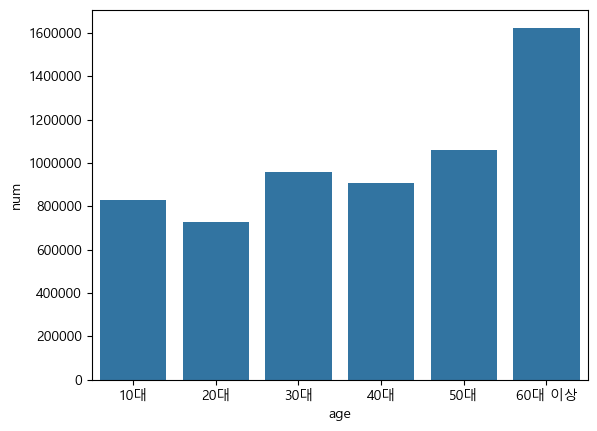

In [7]:
df_dorim_age = pd.read_csv('서울시 상권분석서비스(길단위인구-상권).csv', encoding='euc-kr')
df_dorim_age = df_dorim_age[df_dorim_age['상권_코드_명'] == '도림초등학교']
df_dorim_age = df_dorim_age[df_dorim_age['기준_년분기_코드'] == 20224]
df_dorim_age = df_dorim_age[['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', 
'연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']]
bar_dorim_age = {
    'age' : ['10대', '20대', '30대', '40대', '50대', '60대 이상'],
    'num' : df_dorim_age.values[0]
}
df_dorim_age = pd.DataFrame(bar_dorim_age)
sns.barplot(x='age', y='num', data=df_dorim_age)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')

#### 도림초등학교 상권 추정소비 데이터 시각화

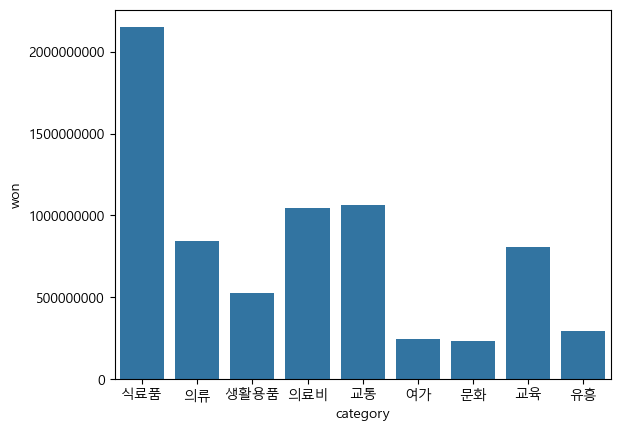

In [8]:
df_dorim_consume = pd.read_csv('서울시 상권분석서비스(소득소비-상권배후지).csv', encoding='euc-kr')
df_dorim_consume = df_dorim_consume[df_dorim_consume['기준_년분기_코드'] == 20224]
df_dorim_consume = df_dorim_consume[df_dorim_consume['상권_코드_명'] == '도림초등학교']
df_dorim_consume = df_dorim_consume[['식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액', '여가_지출_총금액', '문화_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액']]
bar_dorim_consume = {
    'category': ['식료품', '의류', '생활용품', '의료비', '교통', '여가', '문화', '교육', '유흥'],
    'won' : df_dorim_consume.values[0]
}
df_dorim_consume = pd.DataFrame(bar_dorim_consume)
sns.barplot(x='category', y='won', data=df_dorim_consume)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')

#### 서울시 전체 유동인구 데이터

In [9]:
df_seoulpeople = pd.read_csv("서울시 상권분석서비스(길단위인구-자치구).csv", encoding='euc-kr')

#### 상권 코드 데이터

In [10]:
df_code = pd.read_csv("서울시 상권분석서비스(상권영역).csv", encoding="euc-kr")
df_code = df_code.rename(columns={'시군구_코드': '자치구_코드'})

#### 유동인구 & 상권 코드 데이터 결합

In [11]:
df_join1 = pd.merge(df_seoulpeople, df_code, on="자치구_코드")

#### 자치구 코드 데이터

In [12]:
df_district = pd.read_csv("서울시 건축물대장 법정동 코드정보.csv", encoding='euc-kr')
df_district = df_district.rename(columns={'시군구코드': '자치구코드', '시군구명': '자치구명'})
df_district = df_district[["자치구코드", "자치구명"]].drop_duplicates('자치구코드', keep='first')

In [13]:
df_join2 = pd.merge(df_join1, df_district, left_on="자치구_코드", right_on="자치구코드")
df_join2["구"] = [gu[:2] if len(gu)<=3 else gu[:3] for gu in df_join2['자치구명']]

In [14]:
subset = df_join2[df_join2['기준_년분기_코드'] == 20224]
subset

,기준_년분기_코드,자치구_코드,자치구_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,행정동_코드,형태정보,자치구코드,자치구명,구
1110,20224,11110,종로구,69870502,33692273,36178228,7706981,13262209,10942022,11234256,...,골목상권,3110008,배화여자대학교(박노수미술관),197093,453418,11110515,NaN,11110,종로구,종로
1111,20224,11110,종로구,69870502,33692273,36178228,7706981,13262209,10942022,11234256,...,골목상권,3110009,자하문터널,196991,455057,11110550,NaN,11110,종로구,종로
1112,20224,11110,종로구,69870502,33692273,36178228,7706981,13262209,10942022,11234256,...,골목상권,3110010,평창동서측,197064,456643,11110560,NaN,11110,종로구,종로
1113,20224,11110,종로구,69870502,33692273,36178228,7706981,13262209,10942022,11234256,...,골목상권,3110017,정독도서관,198581,453781,11110600,NaN,11110,종로구,종로
1114,20224,11110,종로구,69870502,33692273,36178228,7706981,13262209,10942022,11234256,...,골목상권,3110018,중앙고등학교,198883,453690,11110600,NaN,11110,종로구,종로
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29575,20224,11740,강동구,107789373,50405496,57383877,18269134,12615814,16754767,17640624,...,전통시장,3130322,고분다리전통시장,211771,449208,11740620,NaN,11740,강동구,강동
29576,20224,11740,강동구,107789373,50405496,57383877,18269134,12615814,16754767,17640624,...,전통시장,3130323,둔촌역전통시장,211868,447599,11740660,NaN,11740,강동구,강동
29577,20224,11740,강동구,107789373,50405496,57383877,18269134,12615814,16754767,17640624,...,전통시장,3130324,길동복조리시장,212690,448844,11740685,NaN,11740,강동구,강동
29578,20224,11740,강동구,107789373,50405496,57383877,18269134,12615814,16754767,17640624,...,전통시장,3130325,명일전통시장,212839,449976,11740530,NaN,11740,강동구,강동


#### 요일별 유동인구 데이터 시각화

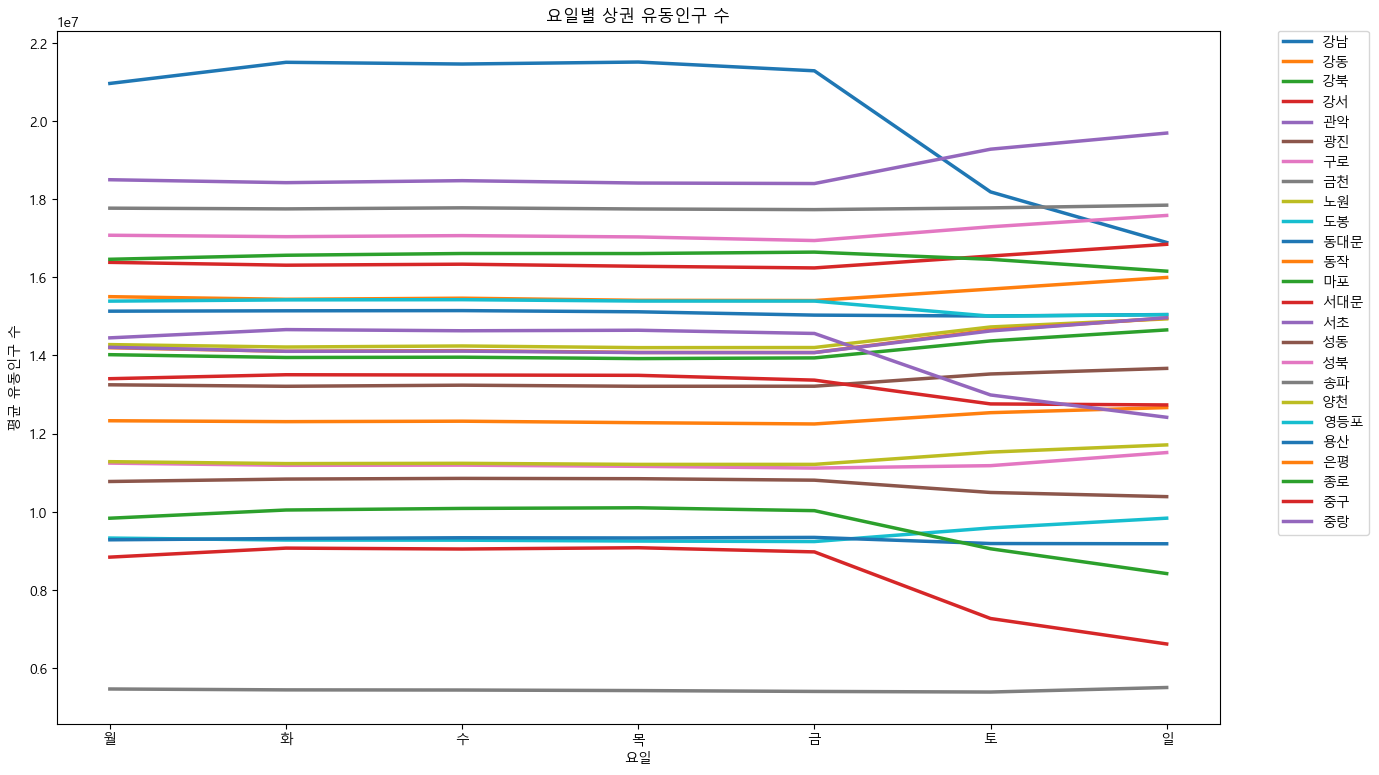

In [15]:
df_daypeople = df_join2[['구', '월요일_유동인구_수','화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수','금요일_유동인구_수','토요일_유동인구_수','일요일_유동인구_수']]
df_daypeople = df_daypeople.groupby('구').mean().round()
df_daypeople.columns = ['월','화','수','목','금','토','일']
fig, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(data=df_daypeople.T, palette="tab10", linewidth=2.5, dashes=False, sort=False).set_title("요일별 상권 유동인구 수")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel="요일", ylabel = "평균 유동인구 수")
plt.show()
fig.savefig("구&요일별 유동인구.png", dpi=200)

#### 매출액 데이터

In [16]:
df_districtsale = pd.read_csv("서울시 상권분석서비스(추정매출-자치구).csv", encoding='euc-kr')
df_districtsale = df_districtsale[['기준_년분기_코드', '자치구_코드', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액']]
df_districtsale = df_districtsale[(df_districtsale['기준_년분기_코드'] == 20224) & ((df_districtsale['자치구_코드'] == 11680) | (df_districtsale['자치구_코드'] == 11560))]

#### 요일별 매출 금액 비교 데이터 시각화

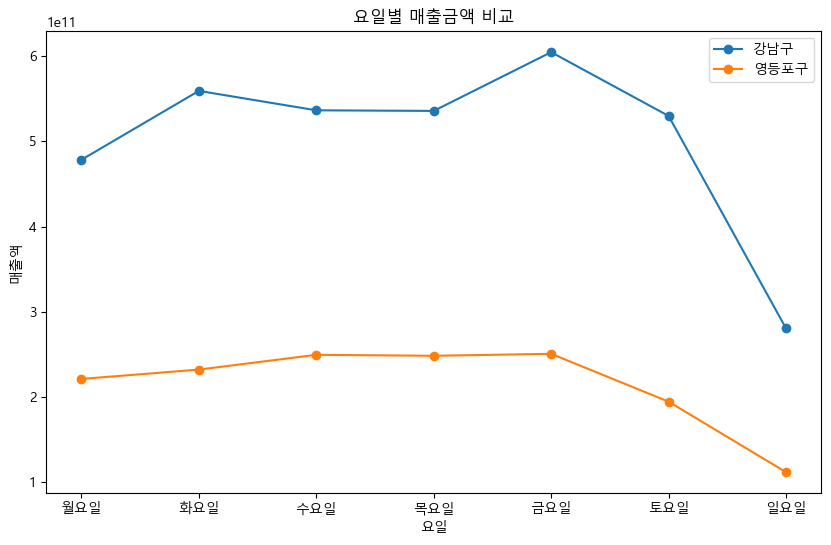

In [17]:
# 데이터 분리
gangnam = df_districtsale[df_districtsale['자치구_코드'] == 11680]
yeongdeungpo = df_districtsale[df_districtsale['자치구_코드'] == 11560]

# 요일별 매출액의 합계
gangnam_sales = [gangnam['월요일_매출_금액'].sum(),
                 gangnam['화요일_매출_금액'].sum(),
                 gangnam['수요일_매출_금액'].sum(),
                 gangnam['목요일_매출_금액'].sum(),
                 gangnam['금요일_매출_금액'].sum(),
                 gangnam['토요일_매출_금액'].sum(),
                 gangnam['일요일_매출_금액'].sum()]

yeongdeungpo_sales = [yeongdeungpo['월요일_매출_금액'].sum(),
                      yeongdeungpo['화요일_매출_금액'].sum(),
                      yeongdeungpo['수요일_매출_금액'].sum(),
                      yeongdeungpo['목요일_매출_금액'].sum(),
                      yeongdeungpo['금요일_매출_금액'].sum(),
                      yeongdeungpo['토요일_매출_금액'].sum(),
                      yeongdeungpo['일요일_매출_금액'].sum()]

days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']


plt.figure(figsize=(10, 6))
plt.plot(days, gangnam_sales, marker='o', label='강남구')
plt.plot(days, yeongdeungpo_sales, marker='o', label='영등포구')
plt.title('요일별 매출금액 비교')
plt.xlabel('요일')
plt.ylabel('매출액')
plt.legend()
plt.show()